# **Ivy League Admission Prediction**

By I. David Ratier Werbin

21 July 2022

*The Ivy League is a group of eight american universities which are viewed as some of the most prestigious universities in the world. In this project I will provide an Exploraty Data Analysis and Regression Model for Admission Chance Prediction*

[Link for more info about Ivy league](https://en.wikipedia.org/wiki/Ivy_League)

[link Data Set](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions)

> 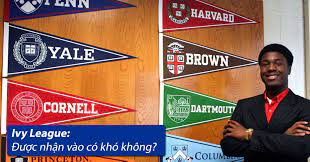







---



**Importing Required Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix #depreciated
from sklearn.svm import SVC



---



# Exploratory Data Analysis

In [ ]:
df = pd.read_csv('/content/sample_data/data/Admission_Predict.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**Serial No:** Identifier

**GRE Score:** Graduate program aptitude test that measures abstract thinking in comprehension, writing, and mathematics

**TOEFL Score:**  World's most accepted English-language test

**University Rating:**

**SOP:** (Statement of Purpose), a critical piece of a graduate school application that tells admissions committees who you are, what your academic and professional interests are, and how you'll add value to the graduate program you're applying to

**LOR:**  Letter of recommendation provided by a faculty member of your current or previous educational institution

**CGPA:** Cumulative Grade Point Average  is an assessment tool used to evaluate your academic performance

**Research:** Whether the student have taken part in a Research

**Chance of Admit:** The possibility of student acceptance rate



In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
df.info(null_counts=True,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


In [ ]:
df.nunique()

Serial No.           400
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 168
Research               2
Chance of Admit       60
dtype: int64

# Data Cleaning

In [ ]:
df = df.drop(['Serial No.'], axis = 1)

In [ ]:
df.rename(columns={'GRE Score':'GRE','TOEFL Score':'TOEFL','University Rating':'UnivRating','Chance of Admit ':'Chance'},inplace=True)

In [ ]:
df.columns

Index(['GRE', 'TOEFL', 'UnivRating', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance'],
      dtype='object')

In [ ]:
df.head()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 400
Columns  : 8

Features     : ['GRE', 'TOEFL', 'UnivRating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance']

Missing values    : 0

Unique values :  
 GRE            49
TOEFL          29
UnivRating      5
SOP             9
LOR             9
CGPA          168
Research        2
Chance         60
dtype: int64


# Visualization

**Count Plot** (UnivRating, TOEFL)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


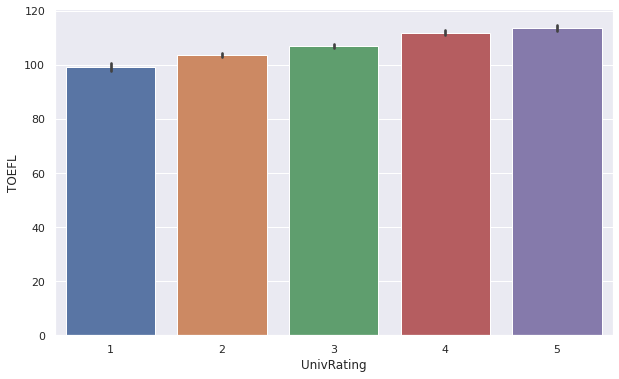

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot('UnivRating', y='TOEFL', data = df);

**Bar Plot** (TOEFL)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


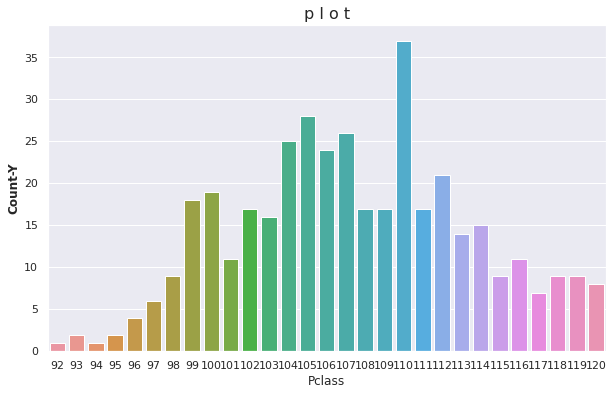

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot('TOEFL', data = df);
plt.xlabel('Pclass')
plt.ylabel("Count-Y", fontsize = 12, fontweight='bold')
plt.title("p l o t", fontsize = 16);

**Hist Plot** (CGPA)

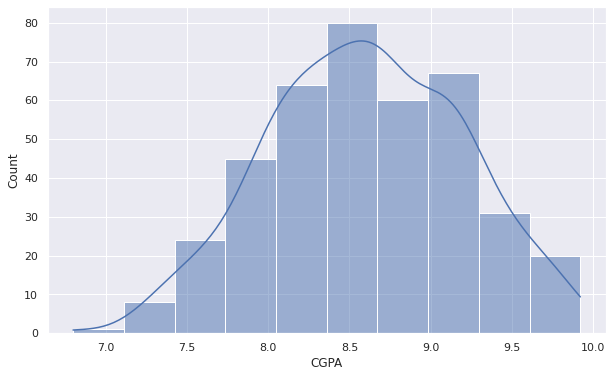

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(data=df, x='CGPA', bins=10, kde=True)

**KDE Plot** (Research, SOP)

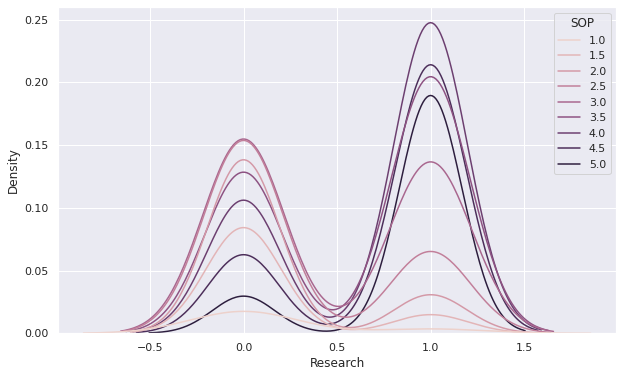

In [ ]:
plt.figure(figsize = (10,6))
sns.kdeplot(data=df, x='Research', hue='SOP')

**Box Plot** (LOR, SOP)

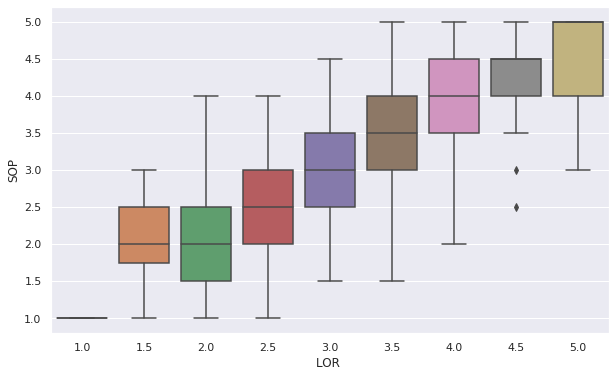

In [ ]:
plt.figure(figsize = (10,6))
sns.boxplot(x='LOR ', y='SOP', data=df)

In [ ]:
columns = ['GRE', 'TOEFL', 'UnivRating', 'SOP', 'LOR ', 'CGPA', 'Research']


print("\n")
for i in range(len(columns)-1):
    print(" " + "*"*50)
    val = df[columns[i]]
    print(" " + columns[i])
    print(" " + "*"*50)
    print(" Minimum                        :{:.2f}".format(val.min()))
    print(" Maximum                        :{:.2f}".format(val.max()))
    print(" Percentile(25%)                :{:.2f}".format(val.quantile(0.25)))
    print(" Percentile(75%)                :{:.2f}".format(val.quantile(0.75)))
    print(" Percentile(50%)/ Median        :{:.2f}".format(val.quantile(0.55)))
    print(" Mean                           :{:.2f}".format(val.mean()))
    print(" Standard Deviation             :{:.2f}".format(val.std()))
    print(" " + "-"*50)
    print("\n")




 **************************************************
 GRE
 **************************************************
 Minimum                        :290.00
 Maximum                        :340.00
 Percentile(25%)                :308.00
 Percentile(75%)                :325.00
 Percentile(50%)/ Median        :319.00
 Mean                           :316.81
 Standard Deviation             :11.47
 --------------------------------------------------


 **************************************************
 TOEFL
 **************************************************
 Minimum                        :92.00
 Maximum                        :120.00
 Percentile(25%)                :103.00
 Percentile(75%)                :112.00
 Percentile(50%)/ Median        :108.00
 Mean                           :107.41
 Standard Deviation             :6.07
 --------------------------------------------------


 **************************************************
 UnivRating
 *************************************************

# Data Correlation

In [ ]:
df.corr()

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
GRE,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
UnivRating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


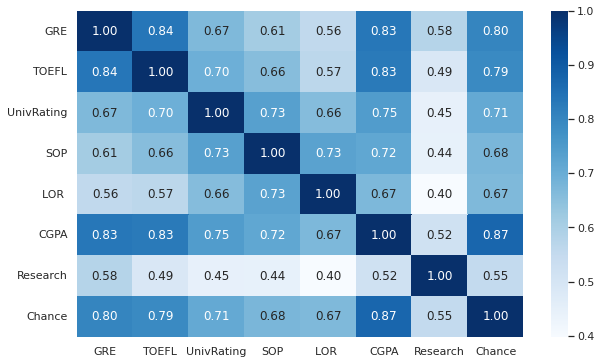

In [ ]:
plt.figure(figsize = (10,6))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Blues',fmt='.2f');

In [ ]:
df.corr()[['TOEFL']]

,TOEFL
GRE,0.835977
TOEFL,1.000000
UnivRating,0.695590
SOP,0.657981
LOR,0.567721
CGPA,0.828417
Research,0.489858
Chance,0.791594


In [ ]:
df.corr()[['TOEFL']].sort_values('TOEFL',ascending=False)

,TOEFL
TOEFL,1.000000
GRE,0.835977
CGPA,0.828417
Chance,0.791594
UnivRating,0.695590
SOP,0.657981
LOR,0.567721
Research,0.489858


# Admission Predict

***Linear Regression***

In [ ]:
X=df.drop(['Chance'], axis = 1).to_numpy()
y = df['Chance'].to_numpy()
print("start: ", X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 100)
print('train :', X_train.shape, y_train.shape)
print("test: ", X_test.shape, y_test.shape)


start:  (400, 7) (400,)
train : (360, 7) (360,)
test:  (40, 7) (40,)


In [ ]:
scaler = MinMaxScaler()
print('Max: ', X_train.max())
print('Min ', X_train.min() )

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Max: ', X_train.max())
print('Min: ', X_train.min())

Max:  340.0
Min  0.0
Max:  1.0
Min:  0.0


In [ ]:

reg = LinearRegression()
reg.fit(X_train, y_train)
pred1 = reg.predict(X_test)
r2_score(y_test, pred1)

0.8505410155199723

# KNN (Clasification)

In [ ]:
df['Chance']=pd.qcut(df['Chance'],q=2,labels=["low", "high"])
df

,GRE,TOEFL,UnivRating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,high
1,324,107,4,4.0,4.5,8.87,1,high
2,316,104,3,3.0,3.5,8.00,1,low
3,322,110,3,3.5,2.5,8.67,1,high
4,314,103,2,2.0,3.0,8.21,0,low
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,high
396,325,107,3,3.0,3.5,9.11,1,high
397,330,116,4,5.0,4.5,9.45,1,high
398,312,103,3,3.5,4.0,8.78,0,low


In [ ]:
X=df.drop(['Chance'], axis = 1).to_numpy()
y = df['Chance'].to_numpy()
print("start: ", X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 41)
print('train :', X_train.shape, y_train.shape)
print("test: ", X_test.shape, y_test.shape)

start:  (400, 7) (400,)
train : (280, 7) (280,)
test:  (120, 7) (120,)


In [ ]:
scaler = MinMaxScaler()
print('Max: ', X_train.max())
print('Min ', X_train.min() )

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Max: ', X_train.max())
print('Min: ', X_train.min())

Max:  340.0
Min  0.0
Max:  1.0
Min:  0.0


In [ ]:
for k in range(3,20,4):
    knn1 = KNeighborsClassifier(n_neighbors = k)
    knn1.fit(X_train,y_train)
    score = knn1.score(X_test, y_test)
    print("k = {} score test: {}".format(k,score))

k = 3 score test: 0.8833333333333333
k = 7 score test: 0.9083333333333333
k = 11 score test: 0.8833333333333333
k = 15 score test: 0.9166666666666666
k = 19 score test: 0.9166666666666666


In [ ]:
best_k = 15
knn1 = KNeighborsClassifier(n_neighbors = best_k)
knn1.fit(X_train,y_train)
score=knn1.score(X_test, y_test)
print("k = {} score test: {}".format(best_k,score))

k = 15 score test: 0.9166666666666666


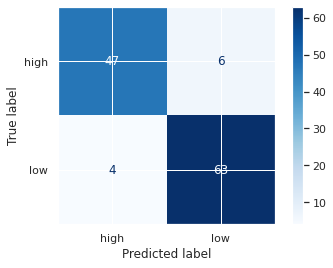

In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay #add to import section
ConfusionMatrixDisplay.from_estimator(knn1, X_test, y_test,values_format="d",cmap='Blues');
#plot_confusion_matrix(knn1, X_test, y_test,values_format="d",cmap='Blues'); #depreciated

In [ ]:
pred1 = knn1.predict(X_test)
print(classification_report(y_test,pred1,digits=4))

              precision    recall  f1-score   support

        high     0.9216    0.8868    0.9038        53
         low     0.9130    0.9403    0.9265        67

    accuracy                         0.9167       120
   macro avg     0.9173    0.9135    0.9152       120
weighted avg     0.9168    0.9167    0.9165       120

